In [135]:
import os
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf

In [136]:
df_img_info = pd.read_csv('img_info.csv')
df_sal_info = pd.read_csv('sal_info.csv')

Traitement

In [137]:
# pour les images
# Groupe by par Model 
model_img = df_img_info.groupby(df_img_info.Model)
img_MV2 = model_img.get_group('MobileNetV2')
img_VGG16 = model_img.get_group('VGG16')
img_ResNet = model_img.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
attaque_img_MV2 = img_MV2.groupby(["Attaque"])
img_MV2_PGD = attaque_img_MV2.get_group('PGD')
img_MV2_FGSM = attaque_img_MV2.get_group('FGSM')

attaque_img_VGG16 = img_VGG16.groupby(["Attaque"])
img_VGG16_PGD = attaque_img_VGG16.get_group('PGD')
img_VGG16_FGSM = attaque_img_VGG16.get_group('FGSM')

attaque_img_ResNet = img_ResNet.groupby(["Attaque"])
img_ResNet_PGD = attaque_img_ResNet.get_group('PGD')
img_ResNet_FGSM = attaque_img_ResNet.get_group('FGSM')


In [138]:
# pour les saillance
# Groupe by par Model 
model_sal = df_sal_info.groupby(df_sal_info.Model)
sal_MV2 = model_sal.get_group('MobileNetV2')
sal_VGG16 = model_sal.get_group('VGG16')
sal_ResNet = model_sal.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
attaque_sal_MV2 = sal_MV2.groupby(["Attaque"])
sal_MV2_PGD = attaque_sal_MV2.get_group('PGD')
sal_MV2_FGSM = attaque_sal_MV2.get_group('FGSM')

attaque_sal_VGG16 = sal_VGG16.groupby(["Attaque"])
sal_VGG16_PGD = attaque_sal_VGG16.get_group('PGD')
sal_VGG16_FGSM = attaque_sal_VGG16.get_group('FGSM')

attaque_sal_ResNet = sal_ResNet.groupby(["Attaque"])
sal_ResNet_PGD = attaque_sal_ResNet.get_group('PGD')
sal_ResNet_FGSM = attaque_sal_ResNet.get_group('FGSM')

C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1657682268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_MV2_FGSM.groupby(img_MV2_FGSM.Objet).mean()


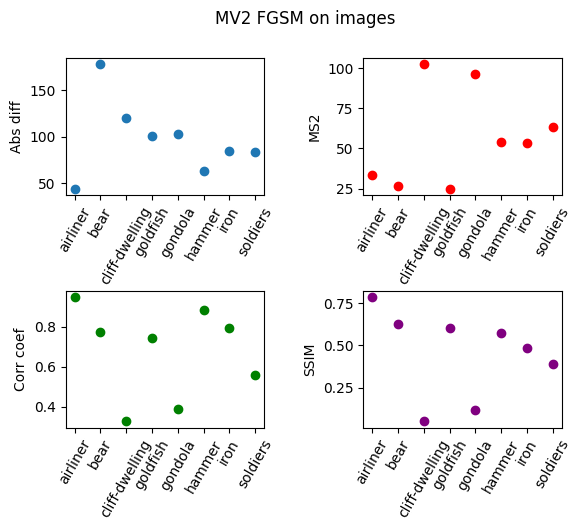

In [178]:
df = img_MV2_FGSM.groupby(img_MV2_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 FGSM on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MS2")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\2996119446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_MV2_FGSM.groupby(sal_MV2_FGSM.Objet).mean()


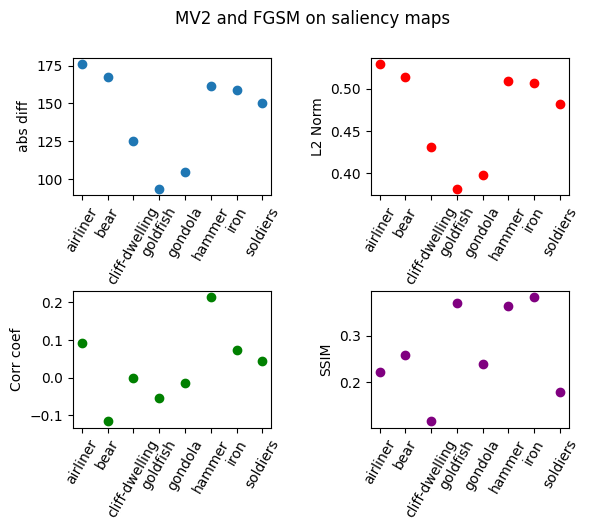

In [176]:
df = sal_MV2_FGSM.groupby(sal_MV2_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 and FGSM on saliency maps')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("abs diff")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 Norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\677004612.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_MV2_PGD.groupby(img_MV2_PGD.Objet).mean()


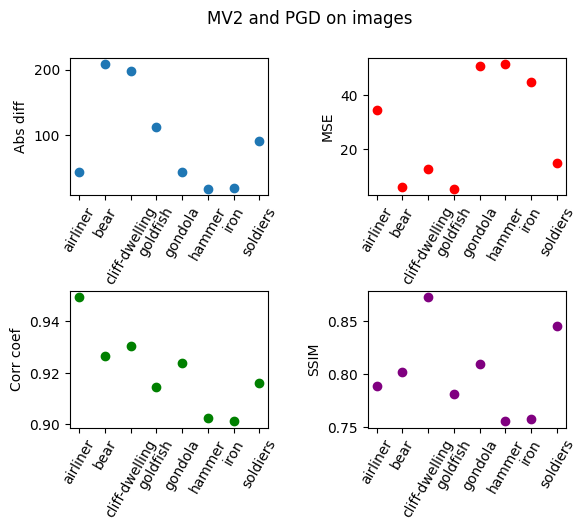

In [179]:
df = img_MV2_PGD.groupby(img_MV2_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 and PGD on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1335214785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_MV2_PGD.groupby(sal_MV2_PGD.Objet).mean()


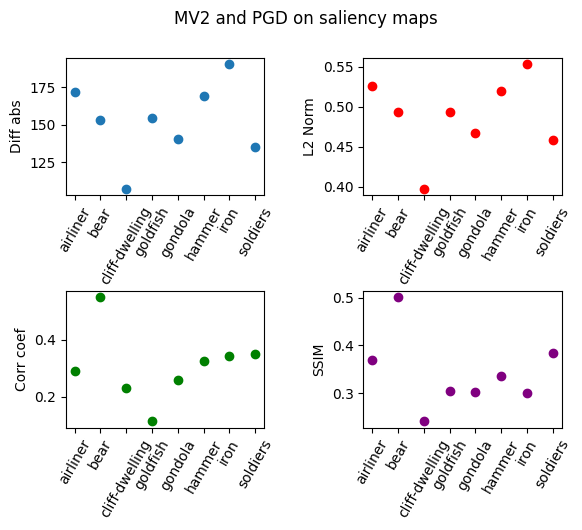

In [180]:
df = sal_MV2_PGD.groupby(sal_MV2_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 and PGD on saliency maps')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 Norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\502764299.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_VGG16_PGD.groupby(img_VGG16_PGD.Objet).mean()


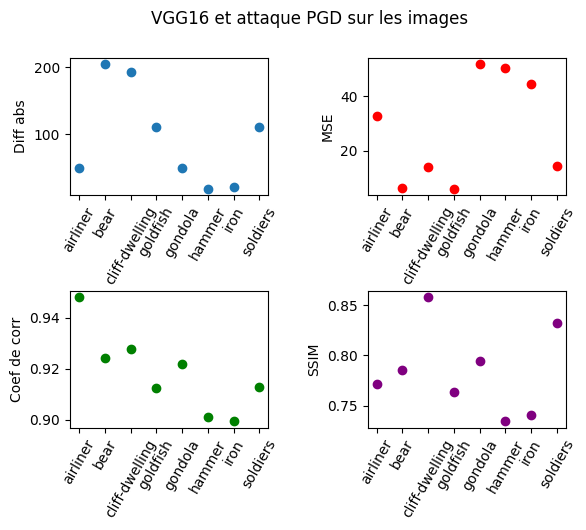

In [143]:
df = img_VGG16_PGD.groupby(img_VGG16_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 and PGD on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr Coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\325091335.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_VGG16_PGD.groupby(sal_VGG16_PGD.Objet).mean()


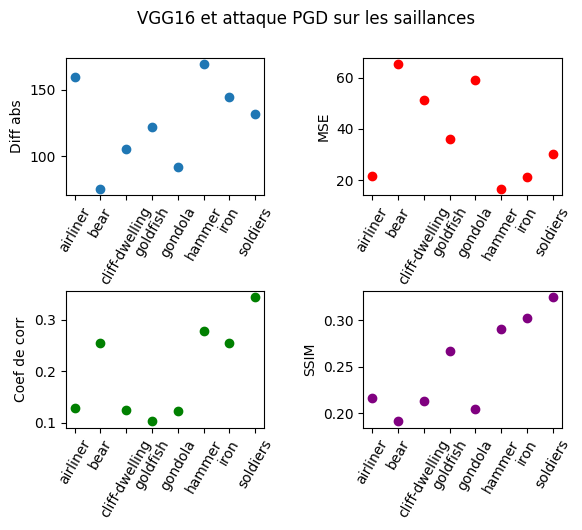

In [144]:
df = sal_VGG16_PGD.groupby(sal_VGG16_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 and PGD on Saliency maps ')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs Diff")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 Norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr Coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\2399423345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Objet).mean()


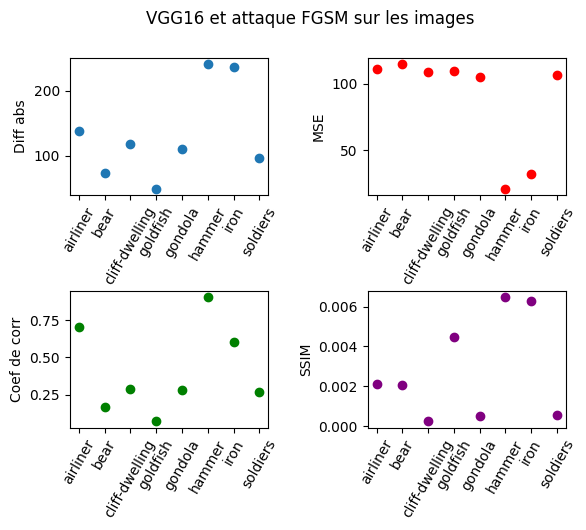

In [145]:
df = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 and FGSM on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\4019114111.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_VGG16_FGSM.groupby(sal_VGG16_FGSM.Objet).mean()


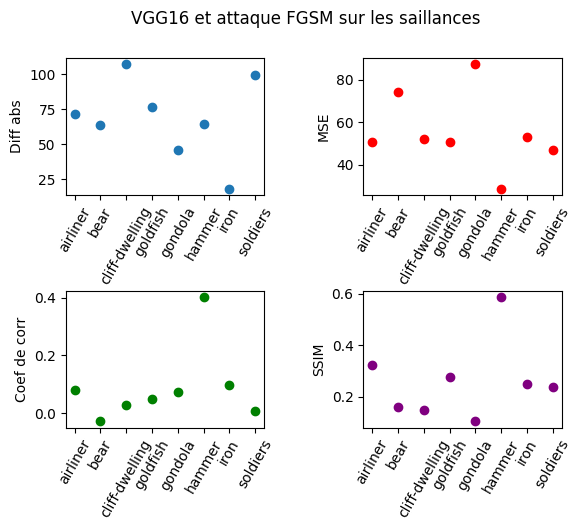

In [146]:
df = sal_VGG16_FGSM.groupby(sal_VGG16_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 and FGSM on saliency maps')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs Diff")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\3955002093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_ResNet_FGSM.groupby(img_ResNet_FGSM.Objet).mean()


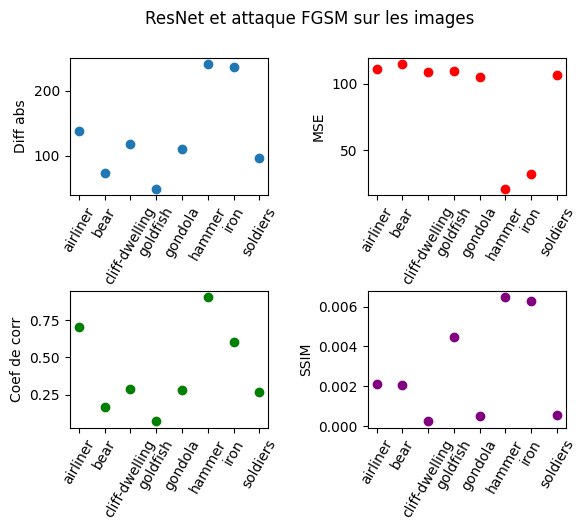

In [147]:
df = img_ResNet_FGSM.groupby(img_ResNet_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet and FGSM on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\3350774277.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_ResNet_FGSM.groupby(sal_ResNet_FGSM.Objet).mean()


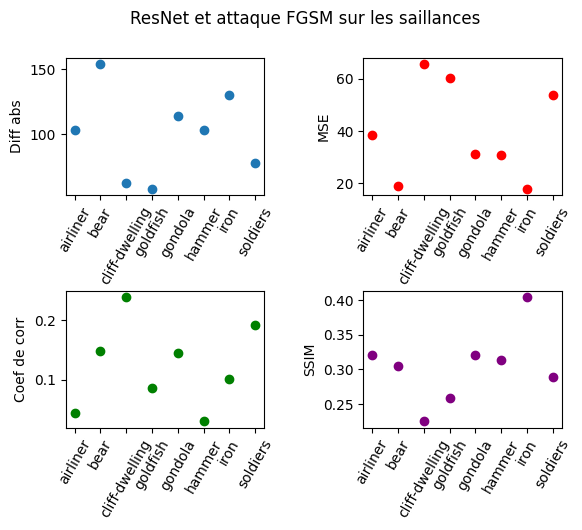

In [148]:
df = sal_ResNet_FGSM.groupby(sal_ResNet_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet and FGSM on saliency maps')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 Norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1849136538.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_ResNet_PGD.groupby(img_ResNet_PGD.Objet).mean()


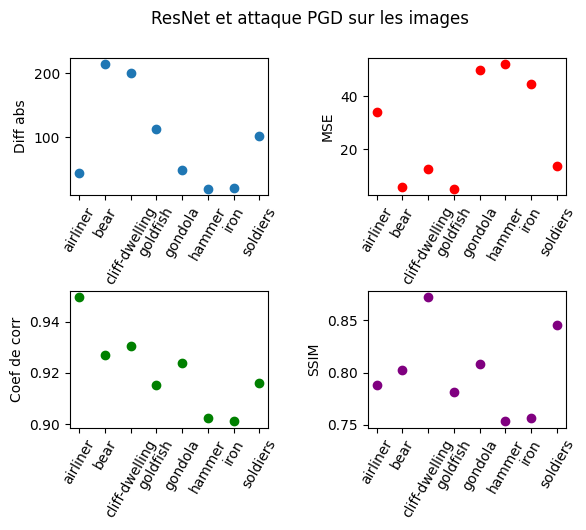

In [149]:
df = img_ResNet_PGD.groupby(img_ResNet_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet and PGD on images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\901355596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sal_ResNet_PGD.groupby(sal_ResNet_PGD.Objet).mean()


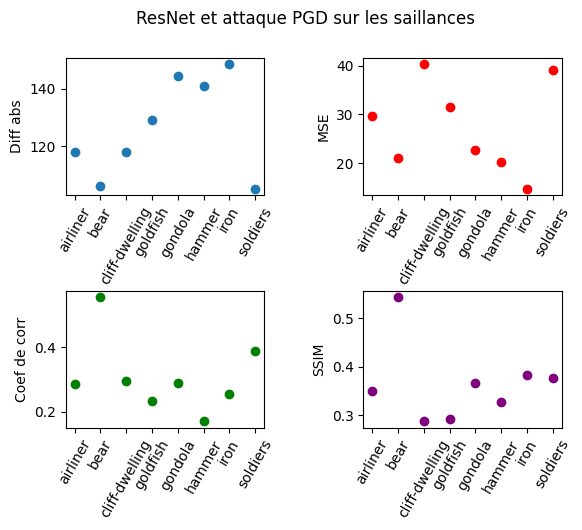

In [150]:
df = sal_ResNet_PGD.groupby(sal_ResNet_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet and PGD on saliency maps')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Abs diff")
ax2.scatter(df.index.tolist(),df["NormeL2"], c = 'red')
ax2.set_ylabel("L2 norm")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Corr coef")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


Graphiques du taux de confiance selon l'intensité de l'attaque

In [151]:
img_VGG16_PGD['Score'] = img_VGG16_PGD['Score']/10000
img_VGG16_FGSM['Score'] = img_VGG16_FGSM['Score']/10000
img_MV2_PGD['Score'] = img_MV2_PGD['Score']/10000
img_MV2_FGSM['Score'] = img_MV2_FGSM['Score']/10000
img_ResNet_PGD['Score'] = img_ResNet_PGD['Score']/10000
img_ResNet_FGSM['Score'] = img_ResNet_FGSM['Score']/10000

C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\3472425763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_VGG16_PGD['Score'] = img_VGG16_PGD['Score']/10000
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\3472425763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_VGG16_FGSM['Score'] = img_VGG16_FGSM['Score']/10000
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\3472425763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [152]:
df_VGG16_PGD = img_VGG16_PGD.groupby(img_VGG16_PGD.Intensité).mean()
df_VGG16_FGSM = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Intensité).mean()

df_MV2_PGD = img_MV2_PGD.groupby(img_MV2_PGD.Intensité).mean()
df_MV2_FGSM = img_MV2_FGSM.groupby(img_MV2_FGSM.Intensité).mean()

df_ResNet_PGD = img_ResNet_PGD.groupby(img_ResNet_PGD.Intensité).mean()
df_ResNet_FGSM = img_ResNet_FGSM.groupby(img_ResNet_FGSM.Intensité).mean()

C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\4177857261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_VGG16_PGD = img_VGG16_PGD.groupby(img_VGG16_PGD.Intensité).mean()
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\4177857261.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_VGG16_FGSM = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Intensité).mean()
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\4177857261.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sel

Text(0.5, 1.0, 'VGG16 and PGD')

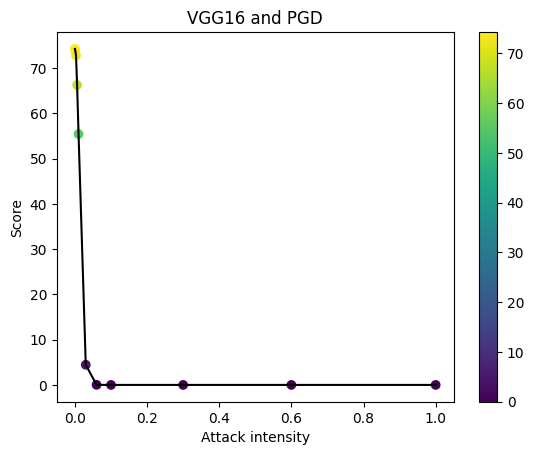

In [153]:
plt.plot(df_VGG16_PGD.index.tolist(),df_VGG16_PGD['Score'], c = 'black')
plt.scatter(df_VGG16_PGD.index.tolist(),df_VGG16_PGD['Score'],c = df_VGG16_PGD['Score'],cmap='viridis')

plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('VGG16 and PGD')

Text(0.5, 1.0, 'VGG16 and PGD')

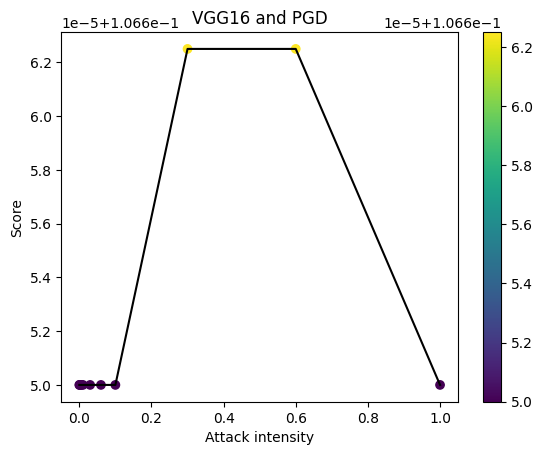

In [168]:
plt.scatter(df_VGG16_FGSM.index.tolist(),df_VGG16_FGSM['Score'],c = df_VGG16_FGSM['Score'],cmap='viridis')
plt.plot(df_VGG16_FGSM.index.tolist(),df_VGG16_FGSM['Score'], c = 'black')
plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('VGG16 and FGSM')

Text(0.5, 1.0, 'VGG16 and PGD')

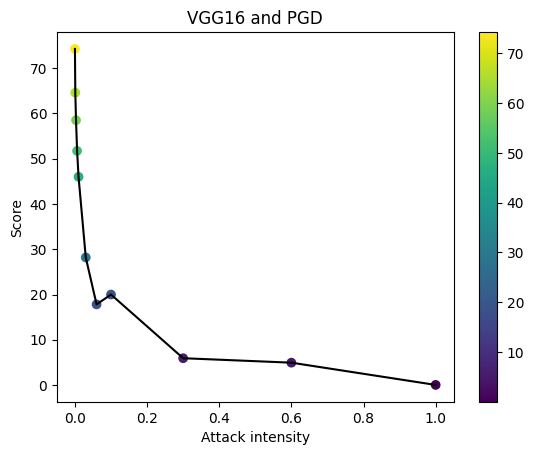

In [169]:
plt.scatter(df_MV2_PGD.index.tolist(),df_MV2_PGD['Score'],c = df_MV2_PGD['Score'],cmap='viridis')
plt.plot(df_MV2_PGD.index.tolist(),df_MV2_PGD['Score'], c = 'black')
plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('MobileNetV2 and PGD')

Text(0.5, 1.0, 'VGG16 and PGD')

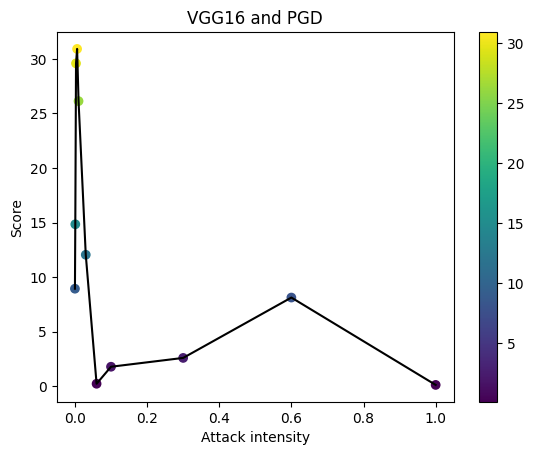

In [170]:
plt.scatter(df_MV2_FGSM.index.tolist(),df_MV2_FGSM['Score'],c = df_MV2_FGSM['Score'],cmap='viridis')
plt.plot(df_MV2_FGSM.index.tolist(),df_MV2_FGSM['Score'], c = 'black')
plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('MobileNetV2 and FGSM')

Text(0.5, 1.0, 'VGG16 and PGD')

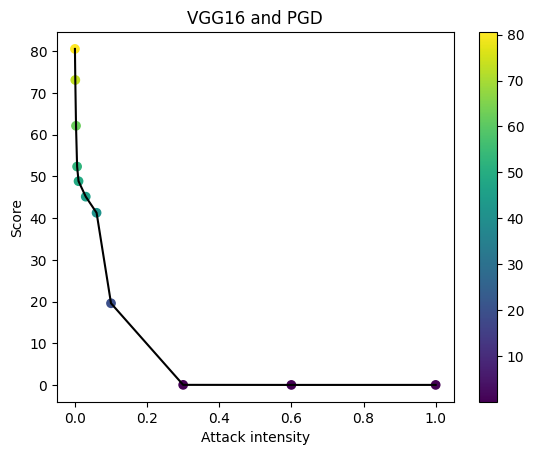

In [172]:
plt.scatter(df_ResNet_PGD.index.tolist(),df_ResNet_PGD['Score'],c = df_ResNet_PGD['Score'],cmap='viridis')
plt.plot(df_ResNet_PGD.index.tolist(),df_ResNet_PGD['Score'], c = 'black')
plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('ResNET and PGD')

Text(0.5, 1.0, 'ResNET and FGSM')

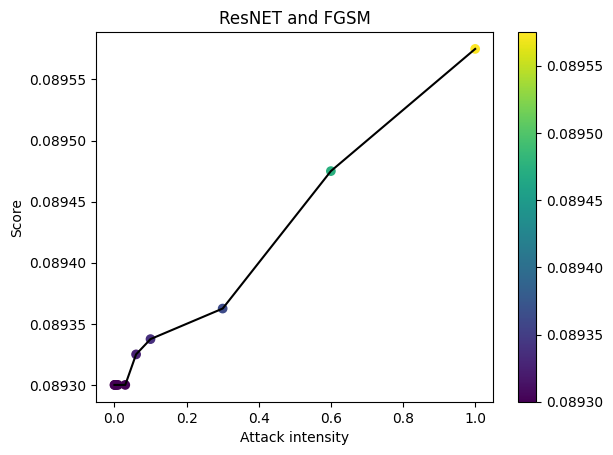

In [173]:
plt.scatter(df_ResNet_FGSM.index.tolist(),df_ResNet_FGSM['Score'],c = df_ResNet_FGSM['Score'],cmap='viridis')
plt.plot(df_ResNet_FGSM.index.tolist(),df_ResNet_FGSM['Score'], c = 'black')
plt.colorbar()
plt.xlabel("Attack intensity")
plt.ylabel('Score')
plt.title('ResNET and FGSM')

In [159]:
df_VGG16_PGD_sal =  sal_VGG16_PGD.groupby(sal_VGG16_PGD.Intensité).mean()
df_VGG16_FGSM_sal = sal_VGG16_FGSM.groupby(sal_VGG16_FGSM.Intensité).mean()

df_MV2_PGD_sal  = sal_MV2_PGD.groupby(sal_MV2_PGD.Intensité).mean()
df_MV2_FGSM_sal  = sal_MV2_FGSM.groupby(sal_MV2_FGSM.Intensité).mean()

df_ResNet_PGD_sal  = sal_ResNet_PGD.groupby(sal_ResNet_PGD.Intensité).mean()
df_ResNet_FGSM_sal  = sal_ResNet_FGSM.groupby(sal_ResNet_FGSM.Intensité).mean()

C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1795630454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_VGG16_PGD_sal =  sal_VGG16_PGD.groupby(sal_VGG16_PGD.Intensité).mean()
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1795630454.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_VGG16_FGSM_sal = sal_VGG16_FGSM.groupby(sal_VGG16_FGSM.Intensité).mean()
C:\Users\lucie\AppData\Local\Temp\ipykernel_19616\1795630454.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for VGG16 and PGD  ')

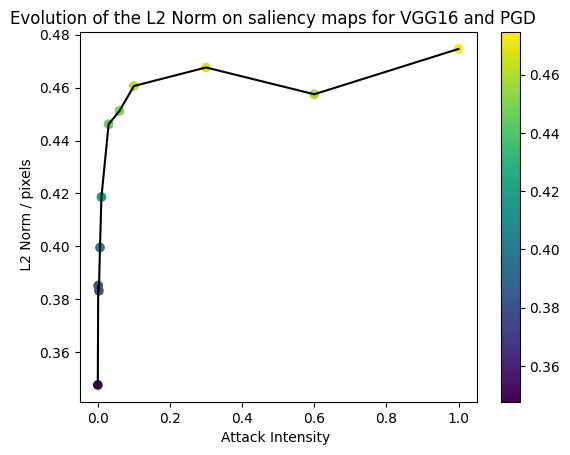

In [160]:
plt.scatter(df_VGG16_PGD_sal.index.tolist(),df_VGG16_PGD_sal['NormeL2'],c = df_VGG16_PGD_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_VGG16_PGD_sal.index.tolist(),df_VGG16_PGD_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels')
plt.title('Evolution of the L2 Norm on saliency maps for VGG16 and PGD  ')

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for VGG16 and FGSM ')

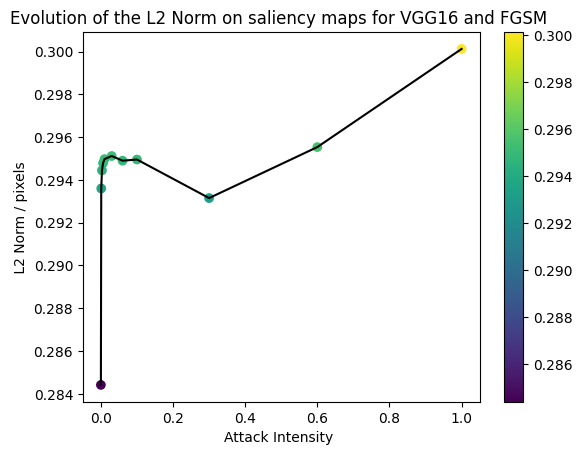

In [161]:
plt.scatter(df_VGG16_FGSM_sal.index.tolist(),df_VGG16_FGSM_sal['NormeL2'],c = df_VGG16_FGSM_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_VGG16_FGSM_sal.index.tolist(),df_VGG16_FGSM_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels ')
plt.title('Evolution of the L2 Norm on saliency maps for VGG16 and FGSM ')

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for MobileNetV2 and PGD ')

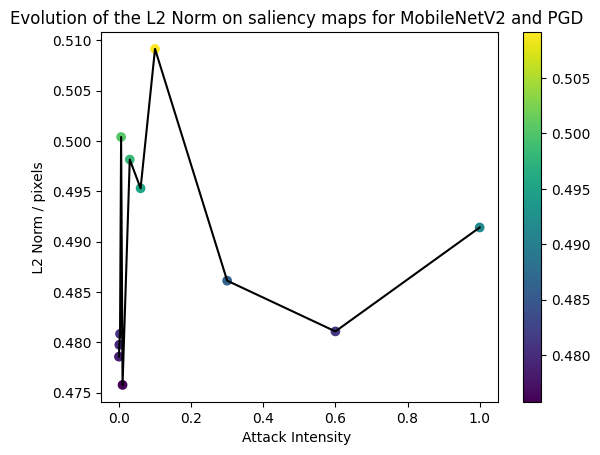

In [162]:
plt.scatter(df_MV2_PGD_sal.index.tolist(),df_MV2_PGD_sal['NormeL2'],c = df_MV2_PGD_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_MV2_PGD_sal.index.tolist(),df_MV2_PGD_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels ')
plt.title('Evolution of the L2 Norm on saliency maps for MobileNetV2 and PGD ')

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for MobileNetV2 and FGSM ')

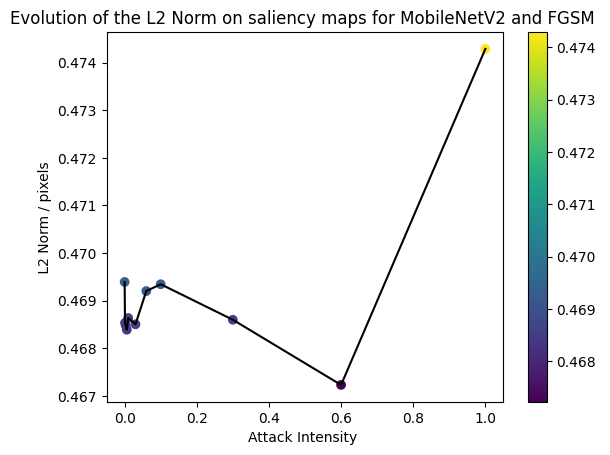

In [163]:
plt.scatter(df_MV2_FGSM_sal.index.tolist(),df_MV2_FGSM_sal['NormeL2'],c = df_MV2_FGSM_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_MV2_FGSM_sal.index.tolist(),df_MV2_FGSM_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels ')
plt.title('Evolution of the L2 Norm on saliency maps for MobileNetV2 and FGSM ')

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for ResNet and PGD ')

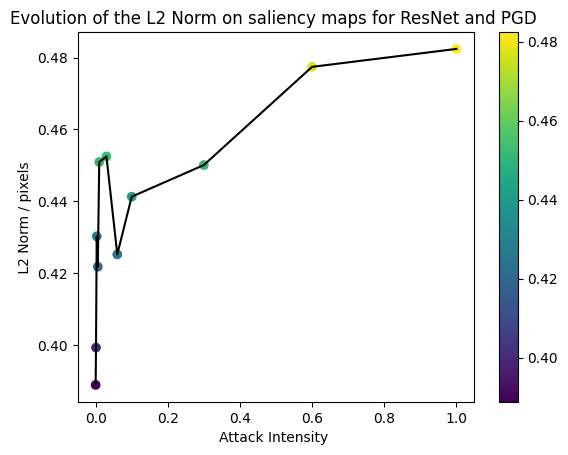

In [164]:
plt.scatter(df_ResNet_PGD_sal.index.tolist(),df_ResNet_PGD_sal['NormeL2'],c = df_ResNet_PGD_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_ResNet_PGD_sal.index.tolist(),df_ResNet_PGD_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels ')
plt.title('Evolution of the L2 Norm on saliency maps for ResNet and PGD ')

Text(0.5, 1.0, 'Evolution of the L2 Norm on saliency maps for ResNet and FGSM ')

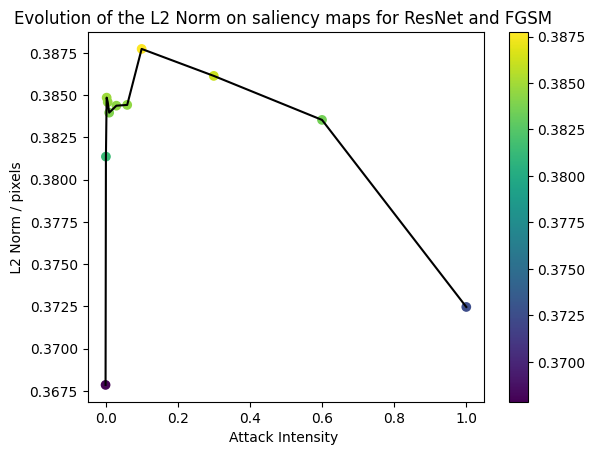

In [165]:
plt.scatter(df_ResNet_FGSM_sal.index.tolist(),df_ResNet_FGSM_sal['NormeL2'],c = df_ResNet_FGSM_sal['NormeL2'],cmap='viridis')
plt.colorbar()
plt.plot(df_ResNet_FGSM_sal.index.tolist(),df_ResNet_FGSM_sal['NormeL2'], c = 'black')

plt.xlabel("Attack Intensity ")
plt.ylabel(' L2 Norm / pixels ')
plt.title('Evolution of the L2 Norm on saliency maps for ResNet and FGSM ')